In [ ]:
# https://www.kaggle.com/datasets/joebeachcapital/natural-gas-prices
! unzip natural-gas.zip

Archive:  natural-gas.zip
  inflating: daily_csv.csv           
  inflating: monthly_csv.csv         
  inflating: natural-gas_zip/README.md  
  inflating: natural-gas_zip/archive/daily.csv  
  inflating: natural-gas_zip/archive/monthly.csv  
  inflating: natural-gas_zip/data/daily_csv.csv  
  inflating: natural-gas_zip/data/daily_json.json  
  inflating: natural-gas_zip/data/monthly_csv.csv  
  inflating: natural-gas_zip/data/monthly_json.json  
  inflating: natural-gas_zip/data/validation_report.json  
  inflating: natural-gas_zip/datapackage.json  


5952
[   1    2    3 ... 5949 5950 5951] [3.82 3.8  3.61 ... 2.46 2.3  2.22]
1.05 18.48
[[0.15892139988525528, 0.15777395295467586, 0.14687320711417096, 0.16465863453815263, 0.16924842226047046, 0.16982214572576018, 0.1887550200803213, 0.2099827882960413, 0.1640849110728629, 0.1267928858290304], [0.15777395295467586, 0.14687320711417096, 0.16465863453815263, 0.16924842226047046, 0.16982214572576018, 0.1887550200803213, 0.2099827882960413, 0.1640849110728629, 0.1267928858290304, 0.1113023522662077], [0.14687320711417096, 0.16465863453815263, 0.16924842226047046, 0.16982214572576018, 0.1887550200803213, 0.2099827882960413, 0.1640849110728629, 0.1267928858290304, 0.1113023522662077, 0.11474469305794606], [0.16465863453815263, 0.16924842226047046, 0.16982214572576018, 0.1887550200803213, 0.2099827882960413, 0.1640849110728629, 0.1267928858290304, 0.1113023522662077, 0.11474469305794606, 0.1095811818703385], [0.16924842226047046, 0.16982214572576018, 0.1887550200803213, 0.2099827882960413, 

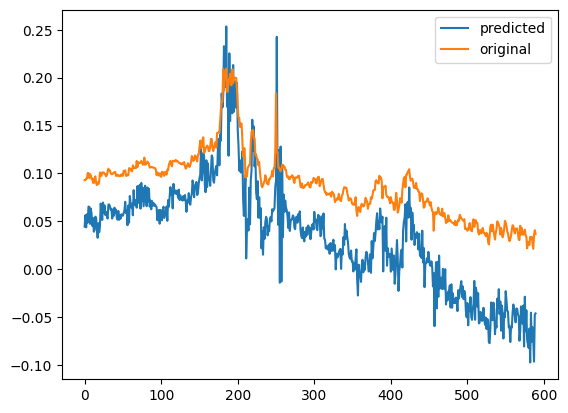

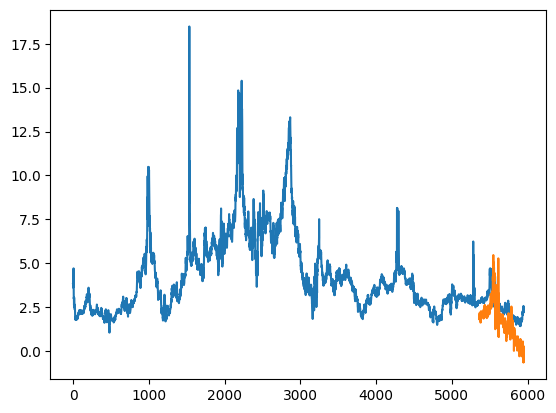

In [ ]:
# GIVEN A FUNCTION IE . SAWTOOTH FUNCTION, MAKE A RNN MODEL TO PREDICT THE NEXT OUTPUT FROM THE PREVIOUS INPUTS , SAME AS THIS QUESTION , YOU HAVE TO MAKE ALL THE DATALOADERS AND EVERTHING BY YOUR SLEF AND SHOW THE OUTPUT
# OF PPREDICTED VALUE AND PLOT GRAPHS.
import numpy as np
import torch
import matplotlib.pyplot as plt
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from torch import nn

df = pd.read_csv("daily_csv.csv")
# Preprocess the data - Drop NA values in the dataset
df = df.dropna()
y = df['Price'].values
x = np.arange(1, len(y), 1)
print(len(y))
# Normalize the input range between 0 and 1
print(x,y)
minm = y.min()
maxm = y.max()
print(minm, maxm)
y = (y - minm) / (maxm - minm)
Sequence_Length = 10
X = []
Y = []
for i in range(0, 5900):
  list1 = []
  for j in range(i, i + Sequence_Length):
    list1.append(y[j])
  X.append(list1)
  Y.append(y[j + 1])
#Convert from list to array
print(X)

X = np.array(X)
Y = np.array(Y)
#Split the data as the train and test set
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.10, random_state=42, shuffle=False, stratify=None)
class NGTimeSeries(Dataset):
  def __init__(self, x, y):
    self.x = torch.tensor(x, dtype=torch.float32)
    self.y = torch.tensor(y, dtype=torch.float32)
    self.len = x.shape[0]
  def __getitem__(self, idx):
    return self.x[idx], self.y[idx]
  def __len__(self):
    return self.len
dataset = NGTimeSeries(x_train,y_train)
from torch.utils.data import DataLoader
train_loader = DataLoader(dataset,shuffle=True,batch_size=512)

class RNNModel(nn.Module):
  def __init__(self):
    super(RNNModel,self).__init__()
    self.rnn = nn.RNN(input_size=1,hidden_size=5,num_layers=1,batch_first=True)
    self.fc1 = nn.Linear(in_features=5,out_features=1)
  def forward(self,x):
    output,_status = self.rnn(x)
    output = output[:,-1,:]
    output = self.fc1(torch.relu(output))
    return output
model = RNNModel()
# optimizer , loss
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
epochs = 1500

# training loop
for i in range(epochs):
  for j, data in enumerate(train_loader):
    y_pred = model(data[:][0].view(-1, Sequence_Length,1)).reshape(-1)
    loss = criterion(y_pred, data[:][1])
    loss.backward()
    optimizer.step()
  if i % 50 == 0:
    print(i, "th iteration : ", loss)
  #test set actual vs predicted
test_set = NGTimeSeries(x_test,y_test)
test_pred = model(test_set[:][0].view(-1,10,1)).view(-1)
plt.plot(test_pred.detach().numpy(),label='predicted')
plt.plot(test_set[:][1].view(-1),label='original')
plt.legend()
plt.show()
#Undo normalization
y = y * (maxm - minm) + minm
y_pred = test_pred.detach().numpy() * (maxm - minm) + minm
plt.plot(y)
plt.plot(range(len(y)-len(y_pred), len(y)), y_pred)
plt.show()

In [ ]:
# https://download.pytorch.org/tutorial/data.zip
! unzip data.zip

Archive:  data.zip
   creating: data/
  inflating: data/eng-fra.txt        
   creating: data/names/
  inflating: data/names/Arabic.txt   
  inflating: data/names/Chinese.txt  
  inflating: data/names/Czech.txt    
  inflating: data/names/Dutch.txt    
  inflating: data/names/English.txt  
  inflating: data/names/French.txt   
  inflating: data/names/German.txt   
  inflating: data/names/Greek.txt    
  inflating: data/names/Irish.txt    
  inflating: data/names/Italian.txt  
  inflating: data/names/Japanese.txt  
  inflating: data/names/Korean.txt   
  inflating: data/names/Polish.txt   
  inflating: data/names/Portuguese.txt  
  inflating: data/names/Russian.txt  
  inflating: data/names/Scottish.txt  
  inflating: data/names/Spanish.txt  
  inflating: data/names/Vietnamese.txt  


In [ ]:
import numpy as np
import pandas as pd
import torch,  torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv('daily_csv.csv')

df = df.dropna()
y = df['Price'].values

x = np.arange(1, len(y), 1)
print("df->x , y", x, y, "\n\n\n\n\n")
minm = y.min()
maxm = y.max()

# df = pd.read_csv("daily_csv.csv")
# # Preprocess the data - Drop NA values in the dataset
# df = df.dropna()
# y = df['Price'].values
# x = np.arange(1, len(y), 1)
# print(len(y))
# # Normalize the input range between 0 and 1
# print(x,y)
# minm = y.min()
# maxm = y.max()






print(minm,maxm)
y = (y - minm) / (maxm-minm)

seq_len = 10

X = []
Y = []
for i in range(0, 5900):
  list1 = []
  for j in range(i, i + Sequence_Length):
    list1.append(y[j])
  X.append(list1)
  Y.append(y[j + 1])
X = np.array(X)
Y = np.array(Y)
print("X-> ",X,"\n Y->",Y, '\ny->', y)

x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.10, random_state=42,  shuffle=False, stratify=None )

class PricePredictorDataloader(Dataset):
  def __init__(self, x, y):
    self.x = torch.tensor(x, dtype=torch.float32)
    self.y = torch.tensor(y, dtype=torch.float32)
    self.len = x.shape[0]
  def __getitem__(self, idx):
    return self.x[idx], self.y[idx]
  def __len__(self):
    return self.len

dataset = PricePredictorDataloader(x_train, y_train)
train_loader = DataLoader(dataset, shuffle=True, batch_size=256)
print("X-> ",X,Y)

class RNN(nn.Module):
  def __init__(self):
    super(RNN, self).__init__()
    self.rnn = nn.RNN(input_size=1,hidden_size=5, num_layers=1, batch_first=True)
    self.fc1 = nn.Linear(in_features=5, out_features=1)

  def forward(self, x):
    output,_status = self.rnn(x)
    output = output[:,-1,:]
    output = self.fc1(torch.relu(output))
    return output

model = RNN()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
epoch = 100
for i in range(epoch):
  for j , data in enumerate(train_loader):
    output = model(data[:][0].view(-1,seq_len, 1)).reshape(-1)

    loss = criterion(output, data[:][1])
    loss.backward()
    optimizer.step()
  if((i+1)%10==0):
      print(i, " ", loss)


df->x , y [   1    2    3 ... 5949 5950 5951] [3.82 3.8  3.61 ... 2.46 2.3  2.22] 





1.05 18.48
X->  [[0.1589214  0.15777395 0.14687321 ... 0.20998279 0.16408491 0.12679289]
 [0.15777395 0.14687321 0.16465863 ... 0.16408491 0.12679289 0.11130235]
 [0.14687321 0.16465863 0.16924842 ... 0.12679289 0.11130235 0.11474469]
 ...
 [0.03384968 0.02180149 0.02868617 ... 0.03384968 0.02753873 0.02122777]
 [0.02180149 0.02868617 0.02639128 ... 0.02753873 0.02122777 0.03557085]
 [0.02868617 0.02639128 0.02524383 ... 0.02122777 0.03557085 0.04073437]] 
 Y-> [0.11130235 0.11474469 0.10958118 ... 0.03557085 0.04073437 0.0367183 ] 
y-> [0.1589214  0.15777395 0.14687321 ... 0.08089501 0.07171543 0.06712565]
X->  [[0.1589214  0.15777395 0.14687321 ... 0.20998279 0.16408491 0.12679289]
 [0.15777395 0.14687321 0.16465863 ... 0.16408491 0.12679289 0.11130235]
 [0.14687321 0.16465863 0.16924842 ... 0.12679289 0.11130235 0.11474469]
 ...
 [0.03384968 0.02180149 0.02868617 ... 0.03384968 0.02753873 0.02122

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Define the dataset
text = "Hello, how are you? I'm doing fine, thank you!"

# Create character to index and index to character mappings
chars = list(set(text))
char_to_index = {char: i for i, char in enumerate(chars)}
index_to_char = {i: char for i, char in enumerate(chars)}

# Define parameters
input_size = len(chars)
hidden_size = 100
output_size = len(chars)
num_layers = 1
learning_rate = 0.01
num_epochs = 100

# Convert text to tensor of character indices
text_indices = [char_to_index[char] for char in text]
input_data = torch.tensor(text_indices[:-1]).unsqueeze(1)
target_data = torch.tensor(text_indices[1:]).unsqueeze(1)

# Define the RNN model
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.rnn = nn.RNN(hidden_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, hidden):
        x = self.embedding(x)
        output, hidden = self.rnn(x, hidden)
        output = self.fc(output)
        return output, hidden

    def init_hidden(self, batch_size):
        return torch.zeros(self.num_layers, batch_size, self.hidden_size)

# Instantiate the model
model = RNN(input_size, hidden_size, output_size, num_layers)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    hidden = model.init_hidden(1)  # Initialize hidden state with batch size 1
    output, _ = model(input_data, hidden)
    loss = criterion(output.view(-1, output_size), target_data.view(-1))
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Function to predict next character
def predict_next_char(model, initial_char, num_chars=1):
    model.eval()
    with torch.no_grad():
        hidden = model.init_hidden(1)
        input_char = torch.tensor([[char_to_index[initial_char]]])
        predicted_chars = initial_char
        for _ in range(num_chars):
            output, hidden = model(input_char, hidden)
            predicted_index = torch.argmax(output[0][-1]).item()
            predicted_char = index_to_char[predicted_index]
            predicted_chars += predicted_char
            input_char = torch.tensor([[predicted_index]])
        return predicted_chars

# Test the model
initial_char = 'H'
predicted_text = predict_next_char(model, initial_char, num_chars=50)
print(f'Initial text: {initial_char}, Predicted text: {predicted_text}')


RuntimeError: Expected hidden size (1, 45, 100), got [1, 1, 100]

In [ ]:
!pip install -q kaggle
from google.colab import files
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets download -d tongpython/cat-and-dog

 96% 209M/218M [00:08<00:00, 29.8MB/s]
100% 218M/218M [00:08<00:00, 28.1MB/s]


In [ ]:
! unzip cat-and-dog.zip


Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

In [ ]:
# Q1
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

train_dataset = ImageFolder('./training_set/training_set', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

class CatDogClassifier(nn.Module):
    def __init__(self):
        super(CatDogClassifier, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 56 * 56, 128)
        self.fc2 = nn.Linear(128, 2)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, kernel_size=2, stride=2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, kernel_size=2, stride=2)
        x = x.view(-1, 64 * 56 * 56)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = CatDogClassifier()

# device = torch.device('cuda' if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.001)

def train_model(model, train_loader, optimizer, criterion, num_epochs=5):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f'Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}')

train_model(model, train_loader, optimizer, criterion, num_epochs=1)

for name, param in model.named_parameters():
    if 'weight' in name:
        print(f'Layer: {name}, L2 norm: {torch.norm(param)}')

Epoch 1, Loss: 0.6887680460732296
Layer: conv1.weight, L2 norm: 3.2800180912017822
Layer: conv2.weight, L2 norm: 4.594982147216797
Layer: fc1.weight, L2 norm: 6.511170864105225
Layer: fc2.weight, L2 norm: 0.8376773595809937


In [ ]:
import torch, torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import torch.optim as optim
import numpy as np
import os , glob
import random

class SurnameDatasets(Dataset):
  def __init__(self, data_folder, seq_len=20):
    self.languages = {}
    self.language_index = {}
    self.surname_data = []
    self.language_list = []
    self.seq_len = seq_len


    for filename in data_folder:
      language = os.path.splitext(os.path.basename(filename))[0]
      self.language_list.append(language)
      self.language_index[language] = len(self.language_index)
      with open(filename, 'r', encoding='utf-8') as file:
        surnames = [line.strip() for line in file]
        self.surname_data.extend([(surname, language) for surname in surnames])
        self.languages[language] = surnames
  def __getitem__(self, idx):
    surname, language = self.surname_data[idx]
    surname = self.surname_to_tensor(surname)
    language_label = self.language_index[language]
    return surname, language_label

  def surname_to_tensor(surname):
    for i, letter in enumerate(surname):
      tensor[i][all_letters.find(letter)] = 1
    return tensor

class RNN(nn.Module):
  def __init__(self, input_size, hidden_size, output_size,num_layers = 2, dropout = 0.2):
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.dropout = dropout

    self.rnn = nn.RNN(input_size = input_size, hidden_size = hidden_size, num_layers = num_layers ,batch_first=True,  dropout = dropout)
    self.fc1 = nn.Linear(hidden_size, output_size)

  def forward(self, x):
    batch_size = x.size(0)
    output = self.rnn(x)
    output = self.fc1(output[:,-1,:])
    return output

  def init_hidden(batch_size):
    return torch.zeros(1, batch_size, self.hidden_size)


def train(model, dataloader, criterion, optimizer, num_epochs):
  for i in range(0, num_epochs):
    running_loss = 0
    for surnames, labels in dataloader:
      optimizer.zero_grad()
      output = model(surnames)
      loss = criterion(output, labels)
      loss.backward()
      optimizer.step()
      running_loss += loss.item()
    print(f"epoch {i+1}/{num_epochs}, loss: {loss/ len(dataloader)}")

def predict_names(model, surname):
  with torch.no_grad():





In [ ]:
import os
import glob
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.utils.data import Dataset, DataLoader
import random
# from torch.nn.functional.one_hot

# Define a class to load and preprocess the surname data
class SurnameDataset(Dataset):
    def __init__(self, data_folder, sequence_length=20):
        self.languages = {}
        self.languages_index = {}
        self.languages_list = []
        self.surname_data = []
        self.sequence_length = sequence_length

        # Load surname data from files
        for filename in glob.glob(data_folder + '/*.txt'):
            language = os.path.splitext(os.path.basename(filename))[0]
            print(filename,"\n",os.path.basename(filename),"\n",os.path.splitext(os.path.basename(filename)))
            self.languages_list.append(language)
            self.languages_index[language] = len(self.languages_index)
            print(self.languages_index,"\n",[language], "\n",len(self.languages_index))
            with open(filename, 'r', encoding='utf-8') as file:
                surnames = [line.strip() for line in file]
                self.surname_data.extend([(surname, language) for surname in surnames])
                self.languages[language] = surnames

    def __len__(self):
        return len(self.surname_data)

    def __getitem__(self, idx):
        surname, language = self.surname_data[idx]
        # Convert surname characters to one-hot encoding
        surname_tensor = self.surname_to_tensor(surname)
        # Convert language to label index
        language_label = torch.tensor(self.languages_index[language], dtype=torch.long)
        return surname_tensor, language_label

    def surname_to_tensor(self, surname):
        tensor = torch.zeros(self.sequence_length, len(all_letters))
        for i, letter in enumerate(surname):
            tensor[i][all_letters.find(letter)] = 1
        return tensor


# Define the RNN model
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=2, dropout=0.2):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.dropout = dropout

        self.rnn = nn.RNN(input_size, hidden_size, num_layers=num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        batch_size = x.size(0)
        output, _ = self.rnn(x)
        output = self.fc(output[:, -1, :])  # Take the last output only
        return output

    def init_hidden(self, batch_size):
        return torch.zeros(1, batch_size, self.hidden_size)


# Define the training function
def train(model, dataloader, criterion, optimizer, num_epochs):
    for epoch in range(num_epochs):
        running_loss = 0.0
        for surnames, labels in dataloader:
            optimizer.zero_grad()
            outputs = model(surnames)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(dataloader)}')


# Define function to predict language from surname
def predict_language(model, surname):
    with torch.no_grad():
        input_tensor = dataset.surname_to_tensor(surname).unsqueeze(0)
        output = model(input_tensor)
        _, predicted_index = torch.max(output, 1)
        predicted_language = dataset.languages_list[predicted_index.item()]
        return predicted_language


# Define a function to randomly sample a surname from the dataset
def random_surname(dataset):
    surname, language = random.choice(dataset.dataset.surname_data)
    print(dataset,dataset.dataset)
    return surname


# Load and preprocess the data
data_folder = 'data/names'
all_letters = 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'
n_languages = 18
dataset = SurnameDataset(data_folder)

# Define hyperparameters
input_size = len(all_letters)
hidden_size = 128
output_size = n_languages
learning_rate = 0.0003
batch_size = 64
num_epochs = 1

# Split dataset into train and test sets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_set, test_set = torch.utils.data.random_split(dataset, [train_size, test_size])

# Create DataLoader objects for train and test sets
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_set, batch_size=1, shuffle=True)

# Instantiate the model, loss function, and optimizer
model = RNN(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
train(model, train_loader, criterion, optimizer, num_epochs)

# Test the model
correct = 0
total = 0
with torch.no_grad():
    for surnames, labels in test_loader:
        outputs = model(surnames)
        _, predicted = torch.max(outputs.data, 1)
        total += 1
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: {100 * correct / total:.2f}%')

# Test predictions
for i in range(5):
    surname = random_surname(test_set)
    predicted_language = predict_language(model, surname)
    print(surname,predicted_language)

data/names/Scottish.txt 
 Scottish.txt 
 ('Scottish', '.txt')
{'Scottish': 0} 
 ['Scottish'] 
 1
data/names/Chinese.txt 
 Chinese.txt 
 ('Chinese', '.txt')
{'Scottish': 0, 'Chinese': 1} 
 ['Chinese'] 
 2
data/names/English.txt 
 English.txt 
 ('English', '.txt')
{'Scottish': 0, 'Chinese': 1, 'English': 2} 
 ['English'] 
 3
data/names/Polish.txt 
 Polish.txt 
 ('Polish', '.txt')
{'Scottish': 0, 'Chinese': 1, 'English': 2, 'Polish': 3} 
 ['Polish'] 
 4
data/names/Portuguese.txt 
 Portuguese.txt 
 ('Portuguese', '.txt')
{'Scottish': 0, 'Chinese': 1, 'English': 2, 'Polish': 3, 'Portuguese': 4} 
 ['Portuguese'] 
 5
data/names/Spanish.txt 
 Spanish.txt 
 ('Spanish', '.txt')
{'Scottish': 0, 'Chinese': 1, 'English': 2, 'Polish': 3, 'Portuguese': 4, 'Spanish': 5} 
 ['Spanish'] 
 6
data/names/French.txt 
 French.txt 
 ('French', '.txt')
{'Scottish': 0, 'Chinese': 1, 'English': 2, 'Polish': 3, 'Portuguese': 4, 'Spanish': 5, 'French': 6} 
 ['French'] 
 7
data/names/Russian.txt 
 Russian.txt 
 ('Ru